In [44]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
#Reading the CSV file
loan_df = pd.read_csv('C:\\Users\\tkaly\\OneDrive\\Desktop\\Docs\\UpGrad\\Lending Club Case Study\\loan.csv')

C:\Users\tkaly\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [47]:
loan_df.shape

(39717, 111)

In [48]:
#Checking null values in columns
missing_columns = loan_df.isnull().sum()/len(loan_df.id)
missing_columns.loc[missing_columns > 0]

emp_title                     0.061913
emp_length                    0.027066
desc                          0.325805
title                         0.000277
mths_since_last_delinq        0.646625
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 68, dtype: float64

In [49]:
# Finding the columns having more than 50% null values
len(missing_columns[missing_columns > 0.5].index)

57

In [50]:
# Dropping columns having more than 50% null values
loan_df = loan_df.drop(missing_columns[missing_columns > 0.5].index,axis=1)

In [51]:
# Finding null value percentage for columns after droping the above columns
loan_df.isnull().sum()/len(loan_df.id)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [52]:
# desc column contains around 32% null values. So dropping the column
loan_df = loan_df.drop('desc',axis=1)

In [53]:
# Checking unique values for emp_title column
loan_df.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [54]:
# Checking unique values for emp_length column
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [55]:
# Checking unique values for title column
loan_df.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [56]:
# Checking unique values for revol_util column
loan_df.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [57]:
# Checking unique values for last_pymnt_d column
loan_df.last_pymnt_d.unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [58]:
# Checking unique values for last_credit_pull_d column
loan_df.last_credit_pull_d.unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [59]:
# Checking unique values for collections_12_mths_ex_med column
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [60]:
# Checking unique values for chargeoff_within_12_mths column
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [61]:
# Checking unique values for pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [62]:
# Checking unique values for tax_liens column
loan_df.tax_liens.unique()

array([ 0., nan])

In [63]:
# Dropping columns where only 0 and nan values are present as these columns will not contribute towards analysis
drop_list = ['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med']
loan_df = loan_df.drop(drop_list,axis = 1)

In [64]:
loan_df.shape

(39717, 50)

In [65]:
# Sum of null values in columns
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_ac

In [66]:
# Removing pub_rec_bankruptcies null value containg rows
loan_df = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [67]:
# Removing emp_title null value containg rows
loan_df = loan_df[~loan_df.emp_title.isnull()]

In [68]:
# Removing emp_length null value containg rows
loan_df = loan_df[~loan_df.emp_length.isnull()]

In [69]:
# Removing title, revol_util, last_pymnt_d null value containg rows
loan_df = loan_df[~loan_df.title.isnull()]
loan_df = loan_df[~loan_df.revol_util.isnull()]
loan_df = loan_df[~loan_df.last_pymnt_d.isnull()]

In [70]:
# Sum of null values in column after removing null valued rows
loan_df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

In [71]:
# Creating new dataframe to back up current dataframe
loan_cleaned = loan_df

In [72]:
# Finding columns with single unique value
loan_cleaned.nunique().sort_values()[loan_cleaned.nunique().sort_values() == 1]

acc_now_delinq         1
application_type       1
policy_code            1
initial_list_status    1
delinq_amnt            1
pymnt_plan             1
dtype: int64

In [73]:
# Dropping columns with single unique value
dropped_list = ['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan']
loan_cleaned = loan_cleaned.drop(dropped_list,axis=1)

In [74]:
loan_cleaned.shape

(36433, 44)

In [75]:
loan_cleaned.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

In [76]:
# Dropping columns which will not impact the analysis 
drop_list = ['id','url','member_id']
loan_cleaned = loan_cleaned.drop(drop_list,axis=1)

In [77]:
loan_cleaned.shape

(36433, 41)

In [78]:
loan_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [79]:
# Dropping funded_amnt as it's duplicate of loan_amnt
loan_cleaned = loan_cleaned.drop('funded_amnt',axis=1)

In [80]:
# Dropping funded_amnt_inv as it's duplicate of loan_amnt
loan_cleaned = loan_cleaned.drop('funded_amnt_inv',axis=1)

In [81]:
loan_cleaned.shape

(36433, 39)

In [82]:
loan_cleaned.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [83]:
# zip_code containing xx in last 2 digit and of no use.
loan_cleaned.zip_code

1        309xx
3        917xx
4        972xx
5        852xx
6        280xx
         ...  
39551    201xx
39562    226xx
39623    207xx
39666    201xx
39680    479xx
Name: zip_code, Length: 36433, dtype: object

In [84]:
# Dropping zip_code column
loan_cleaned = loan_cleaned.drop('zip_code',axis=1)

In [85]:
# Dropping duplicate rows if any
loan_cleaned.drop_duplicates()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36 months,10.91%,404.62,C,C3,Fullmoon Software,2 years,RENT,80000.0,...,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,36 months,10.28%,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.0,...,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,36 months,12.49%,301.04,D,D3,Maximus,8 years,MORTGAGE,39000.0,...,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,36 months,11.22%,507.46,C,C4,ARIN,2 years,MORTGAGE,40000.0,...,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [86]:
# Rounding below columns to 2 digit after dot
loan_cleaned.total_pymnt = round(loan_cleaned.total_pymnt,2)
loan_cleaned.total_rec_late_fee = round(loan_cleaned.total_rec_late_fee,2)
loan_cleaned.collection_recovery_fee = round(loan_cleaned.collection_recovery_fee,2)

In [87]:
# Converting below columns to datetime format
loan_cleaned.issue_d = pd.to_datetime(loan_cleaned.issue_d, format='%b-%y')
loan_cleaned.earliest_cr_line = pd.to_datetime(loan_cleaned.earliest_cr_line, format='%b-%y')
loan_cleaned.last_pymnt_d = pd.to_datetime(loan_cleaned.last_pymnt_d, format='%b-%y')
loan_cleaned.last_credit_pull_d = pd.to_datetime(loan_cleaned.last_credit_pull_d, format='%b-%y')

In [88]:
datetime_column = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [89]:
loan_cleaned[datetime_column].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [90]:
loan_cleaned.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [91]:
# Removing percentage symbol and converting to float in int_rate column
loan_cleaned.int_rate = loan_cleaned.int_rate.str.strip('%').astype(float)

In [92]:
# Removing percentage symbol and converting to float in revol_util column
loan_cleaned.revol_util = loan_cleaned.revol_util.str.strip('%').astype(float)

In [93]:
# Column info after cleaning
loan_cleaned[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


In [94]:
len_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [95]:
# CLeaning emp_length column
loan_cleaned = loan_cleaned.replace({"emp_length":len_dict})

In [96]:
loan_cleaned.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [97]:
# Cleaning term column
loan_cleaned.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [98]:
loan_cleaned.term = loan_cleaned.term.str.slice(0,3)

In [99]:
# Creating earliest_cr_line_month and earliest_cr_line_year columns by extracting earliest_cr_line column
loan_cleaned['earliest_cr_line_month'] = loan_cleaned['earliest_cr_line'].dt.month
loan_cleaned['earliest_cr_line_year'] = loan_cleaned['earliest_cr_line'].dt.year

In [100]:
# Few years are greater than today' date. So subtracting with 100 considering as an error
loan_cleaned[loan_cleaned['earliest_cr_line_year'] > 2020 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [101]:
loan_cleaned.earliest_cr_line_year.value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

In [102]:
# Few years are greater than today' date. So subtracting with 100 considering as an error
loan_cleaned.earliest_cr_line_year = loan_cleaned.earliest_cr_line_year.apply(lambda x : (x - 100) if x > 2011 else x)

In [103]:
loan_cleaned.earliest_cr_line_year.value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
1967      12
1968      12
1966       7
1965       6
1963       4
1962       3
1964       2
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

In [104]:
# Extracting month and year as separate column from issue_d
loan_cleaned['issue_d_month'] = loan_cleaned['issue_d'].dt.month
loan_cleaned['issue_d_year'] = loan_cleaned['issue_d'].dt.year

In [105]:
# Storing cleaned data as backup
loan_cleaned.to_csv('C:\\Users\\tkaly\\OneDrive\\Desktop\\Docs\\UpGrad\\Lending Club Case Study\\master_loan.csv', encoding='utf-8', index=False)

In [106]:
master_loan = loan_cleaned

In [107]:
master_loan.shape

(36433, 42)

In [108]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [109]:
# Removing current status data
master_loan = master_loan[master_loan.loan_status != 'Current']

In [110]:
master_loan.shape

(35367, 42)

Text(0, 0.5, 'Loan Amount')

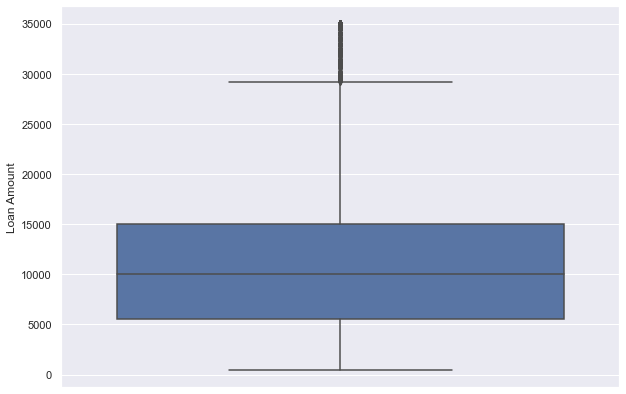

In [111]:
# Setting plot size and boxplot for loan_amnt column
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(y=master_loan.loan_amnt)
plt.ylabel('Loan Amount')

Observations :
    1. Loans varry between 0 to 35000.
    2. Mean of loan is 10000.

Text(0.5, 0, 'Loan Status')

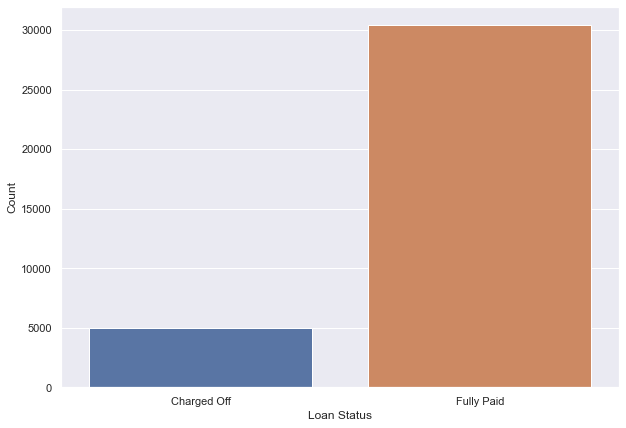

In [133]:
# loan_status countplot
sns.countplot(master_loan.loan_status)
plt.ylabel('Count')
plt.xlabel('Loan Status')

Observation :
    1. Most loans are fully paid.
    2. Charged Off percentage approximately 14% 

In [113]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

Text(0.5, 0, 'Grade')

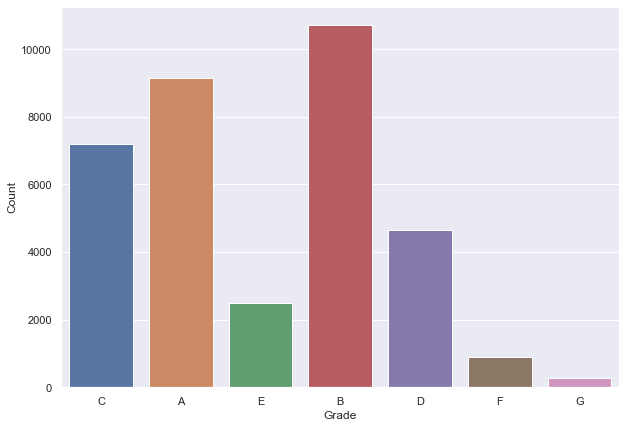

In [137]:
# Grade countplot
sns.countplot(master_loan.grade)
plt.ylabel('Count')
plt.xlabel('Grade')

Observations :
    1. Most loans are of A and B grades

Text(0.5, 0, 'Employee Work Experience')

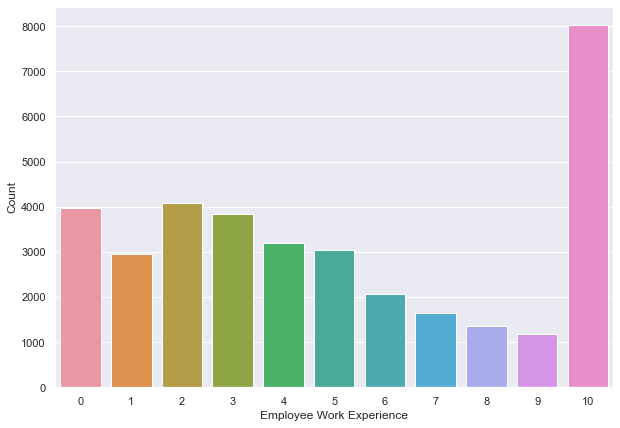

In [136]:
# Work Experience countplot
sns.countplot(master_loan.emp_length)
plt.ylabel('Count')
plt.xlabel('Employee Work Experience')

Observation :
    1. Majority of the employees applying for loan is having more than 10 years of work experience

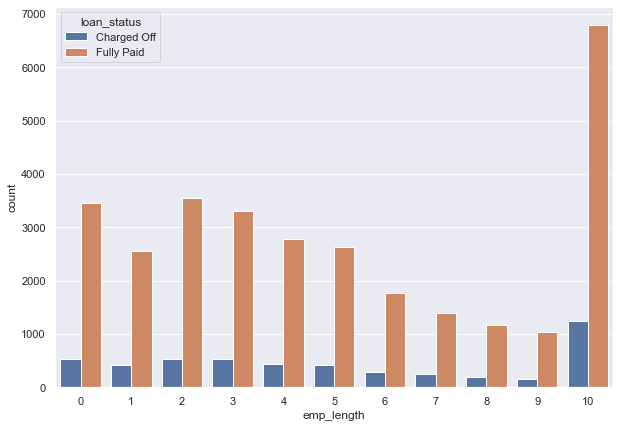

In [116]:
# # Work Experience countplot with Loan Status
sns.countplot(x = 'emp_length',hue='loan_status', data=master_loan)

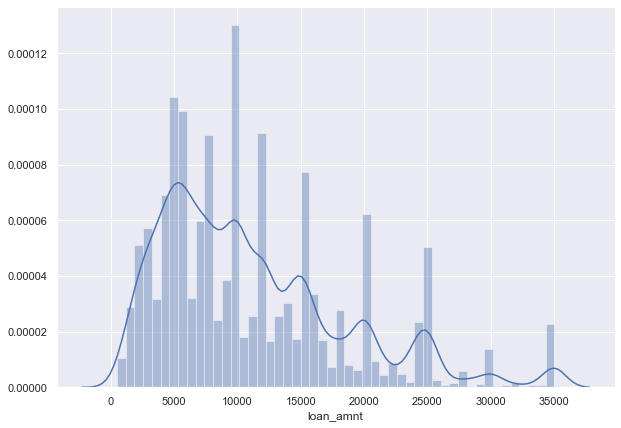

In [139]:
# Loan amount distplot
sns.distplot(master_loan['loan_amnt'])
plt.show()

Observations :
    1. Most of the loan amount given is 5 lakhs

Text(0, 0.5, 'Annual Income in Lakhs')

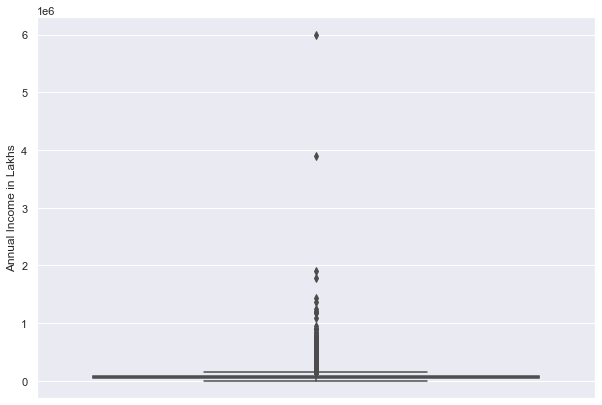

In [140]:
# Annual income box plot
sns.boxplot(y = master_loan.annual_inc)
plt.ylabel('Annual Income in Lakhs')

Observations:
    1. Only 2 sample has more than 30 lakh income

In [142]:
master_loan[master_loan.annual_inc > 3000000]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
29639,25000,60,10.62,334.08,B,B3,Lea Regional Hospital/Pecos Valley,3,MORTGAGE,3900000.0,...,0.0,0.0,2015-06-01,353.14,2015-06-01,0.0,9,1999,6,2010
30107,5000,36,12.73,167.84,C,C1,post office,10,MORTGAGE,6000000.0,...,0.0,0.0,2011-04-01,3845.25,2011-05-01,0.0,1,2001,5,2010


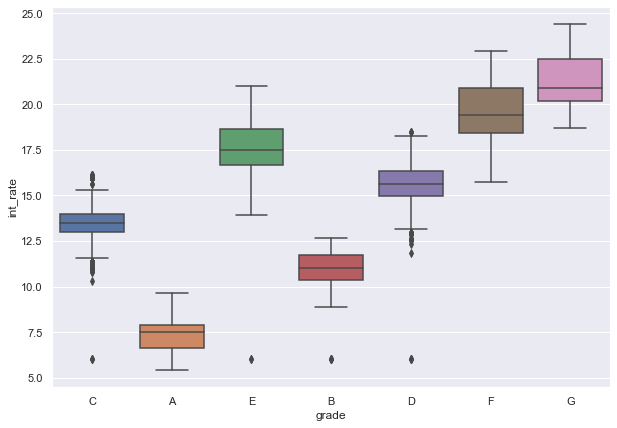

In [119]:
# 
sns.boxplot(x = master_loan.grade,y = master_loan.int_rate)

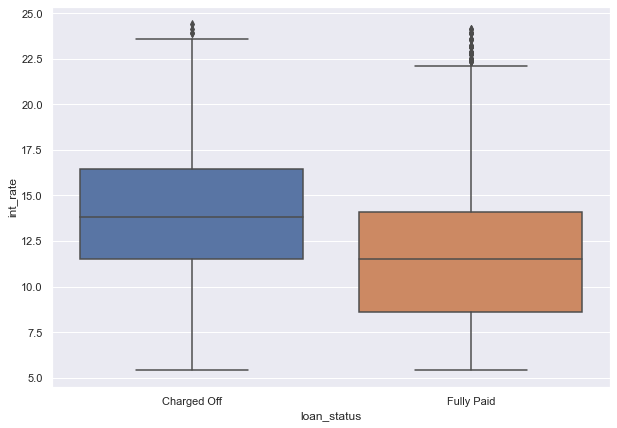

In [120]:
sns.boxplot(y = master_loan.int_rate,x = master_loan.loan_status)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

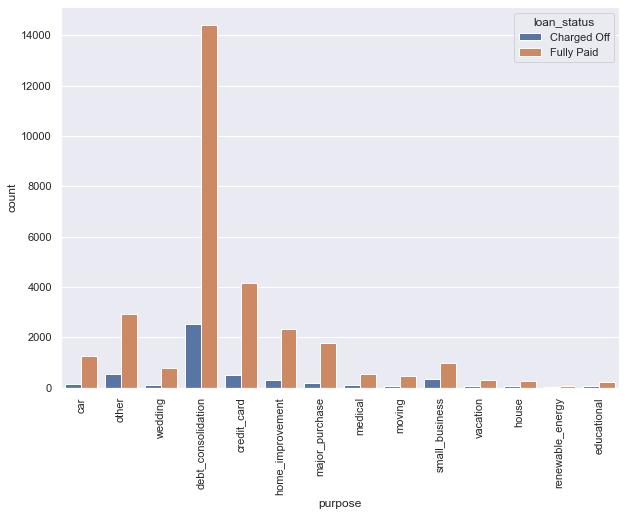

In [121]:
sns.countplot(x = master_loan.purpose,hue=master_loan.loan_status)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

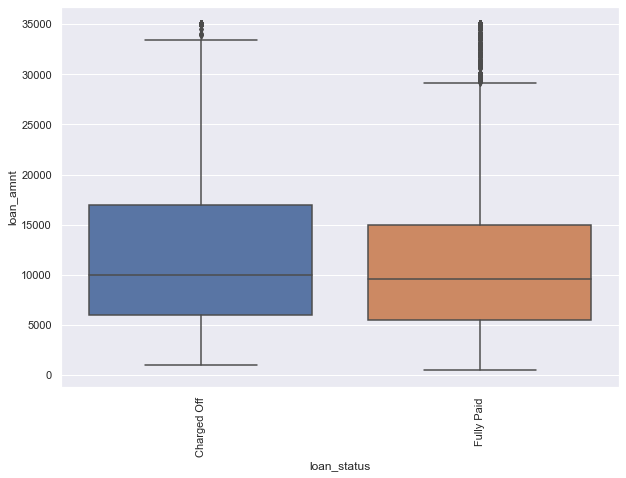

In [122]:
sns.boxplot(y=master_loan.loan_amnt, x = master_loan.loan_status)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

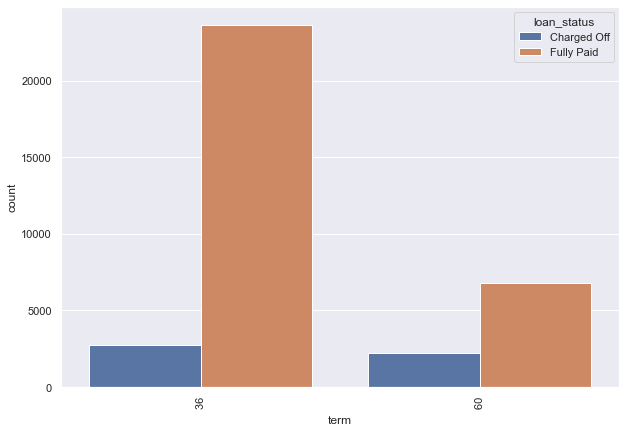

In [123]:
sns.countplot(x = master_loan.term, hue=master_loan.loan_status)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

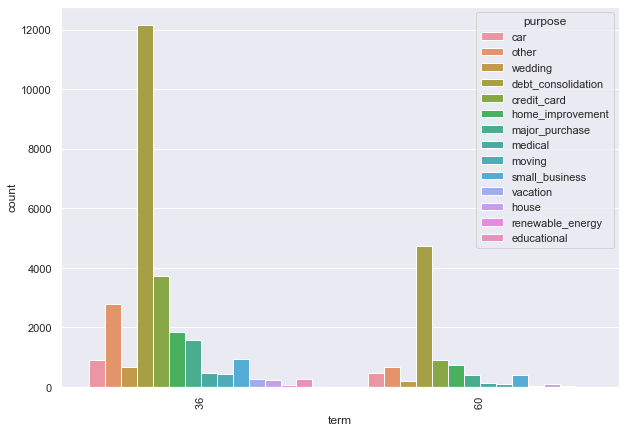

In [124]:
sns.countplot(x = master_loan.term, hue=master_loan.purpose)
plt.xticks(rotation=90)

In [125]:
master_loan[(master_loan.loan_status.astype(str) == 'Fully Paid') & (master_loan.term.astype(int) == 36)].shape[0]/master_loan[master_loan.term.astype(int) == 36].shape[0]

0.8965007392804337

In [126]:
master_loan[(master_loan.loan_status.astype(str) == 'Fully Paid') & (master_loan.term.astype(int) == 60)].shape[0]/master_loan[master_loan.term.astype(int) == 60].shape[0]

0.753837597330367

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

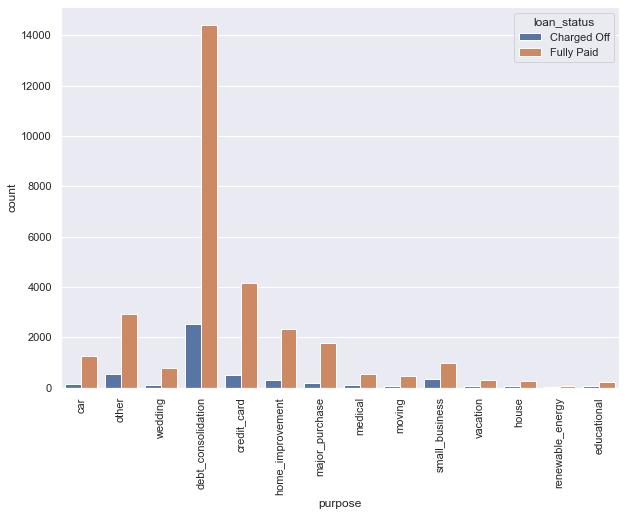

In [127]:
sns.countplot(master_loan.purpose,hue = master_loan.loan_status)
plt.xticks(rotation=90)

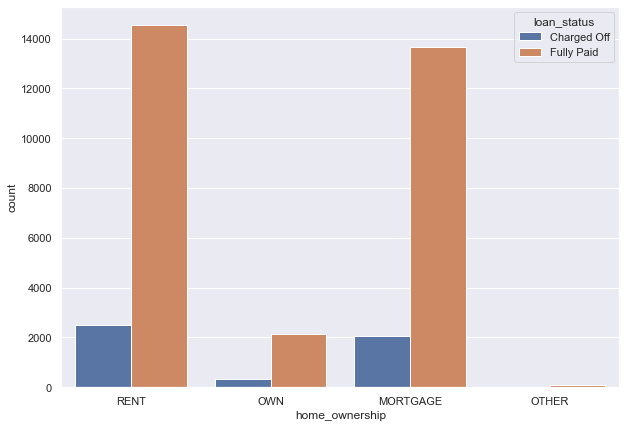

In [128]:
sns.countplot(master_loan.home_ownership,hue=master_loan.loan_status)

In [129]:
#sns.countplot(master_loan.addr_state,hue=master_loan.loan_status)
#plt.xticks(rotation=90)
((master_loan[master_loan.loan_status == 'Charged Off']).groupby('addr_state').loan_status.count()/master_loan.groupby('addr_state').loan_status.count())

addr_state
AK    0.205479
AL    0.118388
AR    0.115741
AZ    0.139842
CA    0.152595
CO    0.117302
CT    0.119266
DC    0.068966
DE    0.104762
FL    0.172387
GA    0.154828
HI    0.169935
IA         NaN
ID         NaN
IL    0.135409
IN         NaN
KS    0.103004
KY    0.146758
LA    0.115681
MA    0.117697
MD    0.147368
MI    0.138846
MN    0.129964
MO    0.155993
MS    0.055556
MT    0.126761
NC    0.145833
NE         NaN
NH    0.148649
NJ    0.153569
NM    0.171779
NV    0.219457
NY    0.129356
OH    0.125912
OK    0.136029
OR    0.158690
PA    0.116533
RI    0.135135
SC    0.142180
SD    0.181818
TN    0.200000
TX    0.111292
UT    0.144105
VA    0.128571
VT    0.127660
WA    0.152778
WI    0.126615
WV    0.127389
WY    0.040000
Name: loan_status, dtype: float64

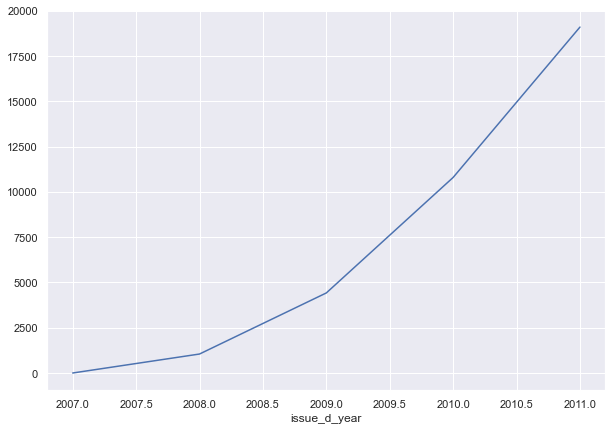

In [130]:
master_loan.groupby('issue_d_year')['loan_status'].count().plot()

In [131]:
master_loan.groupby('issue_d_year')['loan_status'].count()

issue_d_year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: loan_status, dtype: int64